## Assignment 4 (50 marks)
#### =====================================================================================================
### Deadline: 11/02 11:59 pm
#### =====================================================================================================

### Problem 1: PCA (20 marks)

`lab04_dataset_1.csv` contains 205 observations on various vehicles. This is an unsupervised training data. You will use the entire dataset for `PCA`.

### 1.a (2 marks)

For the 14 input features, drop any rows with missing numerical values and output the new length of the training dataset.

In [24]:
import pandas as pd

def process_data(file_path):
    df = pd.read_csv(file_path)
    df.replace('?', pd.NA, inplace=True)
    df.dropna(inplace=True)
    df.drop(columns='price')
    return df

if __name__ == "__main__":
    cleaned_data = process_data("lab04_dataset_1.csv")
    print(cleaned_data.shape)

(195, 14)


### 1.b (6 marks)

Using the sklearn's [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) method, compute all the principal components (PCs) of the normalized dataset. All the PCs capture a fraction of the total variance, output all the variances captured by all the PCs. Write a code snippet that checks all the PCs and selects the `top k PCs` whose total variance captured is atleast `90%`. What did `k` come out to be?

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

def run_pca(path="lab04_dataset_1.csv", threshold=0.9, verbose=True):
    X = process_data(path)
    Xn = StandardScaler().fit_transform(X)
    pca = PCA(n_components=None)
    pca.fit(Xn)
    ratios = pca.explained_variance_ratio_
    cumalative_sum = np.cumsum(ratios)
    k = np.searchsorted(cumalative_sum, threshold) + 1
    
    if verbose:
        print("Explained variance ratio per PC:")
        for i, r in enumerate(ratios, 1):
            print(f"PC{i:02d}: {r:.6f}")
        print(f"\nCumulative variance at k={k}: {cumalative_sum[k-1]:.4f}")   
        print(f"\nk = {k} PCs to reach at least 90% total variance") 
    return Xn, k
    
if __name__ == "__main__":
    run_pca()

Explained variance ratio per PC:
PC01: 0.537987
PC02: 0.162802
PC03: 0.086867
PC04: 0.064973
PC05: 0.043496
PC06: 0.029693
PC07: 0.022900
PC08: 0.019296
PC09: 0.008594
PC10: 0.007900
PC11: 0.005828
PC12: 0.004587
PC13: 0.003671
PC14: 0.001407

Cumulative variance at k=6: 0.9258

k = 6 PCs to reach at least 90% total variance


### 1.c (3 marks)

Using the `top k PCs`, apply `dimensionality reduction` on the normalized dataset to generate and display the transformed dataset which should now have only `k columns`. Display the output as a DataFrame.

In [26]:
def dim_reduction(path="lab04_dataset_1.csv"):
    Xn, k = run_pca(path, 0.9, False)
    
    X_reduced = PCA(n_components=k).fit(Xn).transform(Xn)[:, :k]
    reduced_df = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(k)])
    print(reduced_df.head())

if __name__ == "__main__":
    dim_reduction()

        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.612999 -2.164573 -0.298752 -2.436486  0.194563 -0.116741
1 -0.493886 -2.190732 -0.248341 -2.476630  0.331332 -0.157826
2  0.443900 -1.365449  1.449443  0.626999  0.359939 -2.002387
3 -0.178982 -0.256392  0.066248  1.153280  0.277470  0.118314
4  1.269804 -1.167075  0.018756  1.204362  0.048029 -0.332126


### 1.d (3 marks)

We learned in class that we can also obtain the PCs using a matrix decomposition technique called `SVD:` $X=U\Lambda V$. Use `SVD` on the original normalized dataset to obtain the 3 decomposed matrices and output them.

In [27]:
def run_svd(path="lab04_dataset_1.csv"):
    X = process_data(path)
    Xn = StandardScaler().fit_transform(X)

    U, s, V = np.linalg.svd(Xn, full_matrices=False)
    Sigma = np.diag(s)
    
    U_df = pd.DataFrame(U, X.index, columns=[f"u{i+1}" for i in range(U.shape[1])])
    Sigma_df = pd.DataFrame(Sigma, columns=[f"s{i+1}" for i in range(Sigma.shape[1])])
    V_df = pd.DataFrame(V, index=[f"PC{i+1:02d}" for i in range(V.shape[0])])
    
    print("U", U_df.head(), "\n")
    print("Sigma", Sigma_df.head(), "\n")
    print("V", V_df.head())
    
    return U_df, Sigma_df, V_df
    
if __name__ == "__main__":
    run_svd()

U          u1        u2        u3  ...       u12       u13       u14
0 -0.015995  0.102674  0.019400  ...  0.101114 -0.048439  0.008628
1 -0.012887  0.103915  0.016127  ...  0.079009 -0.062272  0.021627
2  0.011583  0.064769 -0.094122  ... -0.098261 -0.027142 -0.067653
3 -0.004670  0.012162 -0.004302  ... -0.066190  0.082089  0.012842
4  0.033134  0.055359 -0.001218  ...  0.044259 -0.032666  0.035416

[5 rows x 14 columns] 

Sigma           s1         s2         s3         s4  ...  s11  s12  s13  s14
0  38.323675   0.000000   0.000000   0.000000  ...  0.0  0.0  0.0  0.0
1   0.000000  21.081984   0.000000   0.000000  ...  0.0  0.0  0.0  0.0
2   0.000000   0.000000  15.399544   0.000000  ...  0.0  0.0  0.0  0.0
3   0.000000   0.000000   0.000000  13.318219  ...  0.0  0.0  0.0  0.0
4   0.000000   0.000000   0.000000   0.000000  ...  0.0  0.0  0.0  0.0

[5 rows x 14 columns] 

V             0         1         2   ...        11        12        13
PC01  0.288205  0.328462  0.323878  ... -0

### 1.e (3 marks)

Generate the `k` (obtained from `1.b`) largest eigenvalues from the decomposed matrices obtained from the `SVD`. Remember, eigenvalue $\lambda=\Lambda^2/n$

In [29]:
def largest_eigen(path="lab04_dataset_1.csv"):
    Xn, k = run_pca(path, verbose=False)
    
    U, s, V = np.linalg.svd(Xn, full_matrices=False)

    eigvals = (s**2) / Xn.shape[0]
    return eigvals[:k]

if __name__ == "__main__":
    print(largest_eigen())

[7.53181553 2.27923094 1.21613308 0.90961519 0.60894217 0.4157043 ]


### 1.f (3 marks)

Generate the projections of the normalized dataset using the `first k PCs` obtained from the `SVD` and display it inside a DataFrame.

In [30]:
def projection():
    Xn, k = run_pca(verbose=False)
    U, s, v = np.linalg.svd(Xn, full_matrices=False)
    
    Z = U[:, :k] * s[:k]
    proj_df = pd.DataFrame(Z, columns=[f"PC{i+1}" for i in range(k)])
    print(proj_df.head())
    
if __name__ == "__main__":
    projection()

        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.612999  2.164573  0.298752  2.436486 -0.194563  0.116741
1 -0.493886  2.190732  0.248341  2.476630 -0.331332  0.157826
2  0.443900  1.365449 -1.449443 -0.626999 -0.359939  2.002387
3 -0.178982  0.256392 -0.066248 -1.153280 -0.277470 -0.118314
4  1.269804  1.167075 -0.018756 -1.204362 -0.048029  0.332126


### Problem 2: Clustering (30 marks)

`lab04_dataset_2.csv` contains 239 observations with two input features *x1* and *x2*.

`lab04_dataset_3.csv` contains 1440 observations with two input features *x1* and *x2*.

For this task, you will perform various clustering-related operations using sklearn's [`clustering`](https://scikit-learn.org/stable/modules/clustering.html) module.

### 2.a (6 marks)

Using `lab04_dataset_2.csv`, apply sklearn's `KMeans` algorithm on the two-dimensional data and output the resulting clusters using a scatterplot. You will apply `KMeans` over several clusters ranging from cluster-count `K = 2 to 6`. Make sure for every iteration of different cluster-count, your scatterplot should use `K colors` to clearly distinguish the data points belonging in their respective `K clusters`. Also, compute the `Silhouette score` for each of those `K clusters` and plot that score against `K`. Label the plot axes accordingly.

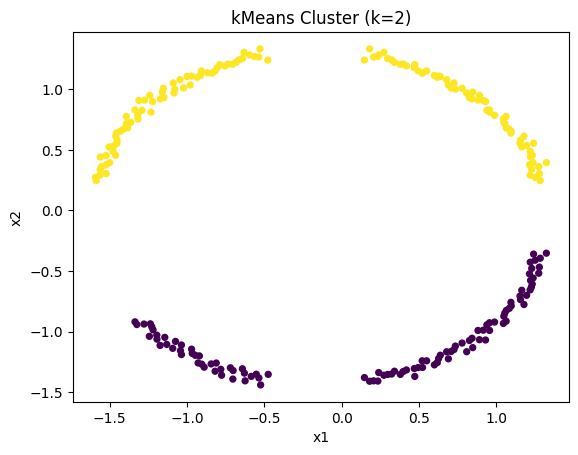

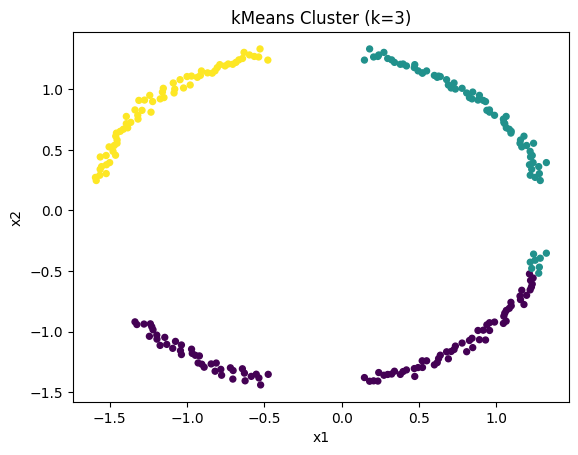

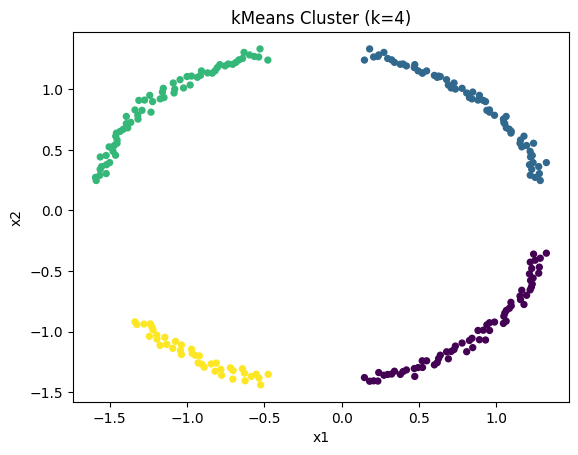

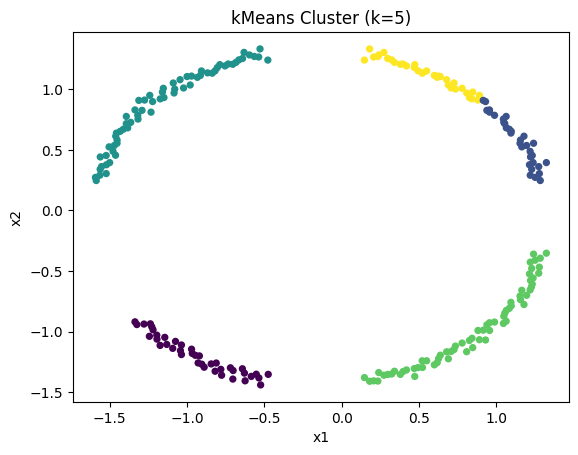

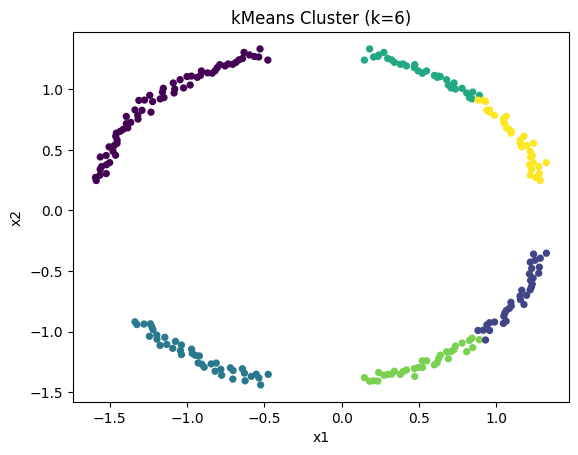

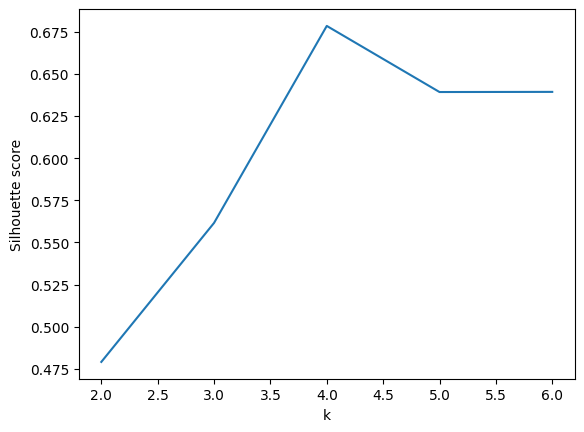

In [31]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans(cluster_range=range(2,7), random_state=0):
    df = pd.read_csv("lab04_dataset_2.csv")
    X = df[["x1", "x2"]].to_numpy()
    Xn = StandardScaler().fit_transform(X)
    
    k_labels = {}
    sil_score = []
    
    for k in cluster_range:
        km = KMeans(n_clusters=k, n_init=10, random_state=random_state)
        label = km.fit_predict(Xn)
        k_labels[k] = label
        sil_score.append(silhouette_score(Xn, label))
        
        plt.figure()
        plt.scatter(Xn[:, 0], Xn[:, 1], c=label, s=18)
        plt.title(f"kMeans Cluster (k={k})")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.show()
        
    plt.figure()
    plt.plot(list(cluster_range), sil_score)
    plt.xlabel("k")
    plt.ylabel("Silhouette score")
    plt.show()

if __name__ == "__main__":
    kmeans()

### 2.b (6 marks)

Repeat `2.a` but instead use sklearn's `GaussianMixture` model for learning.

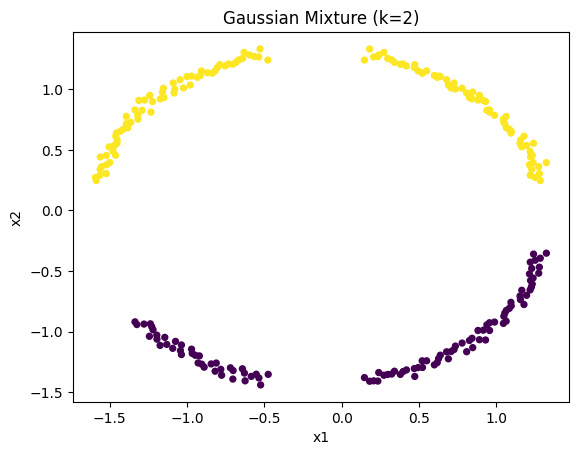

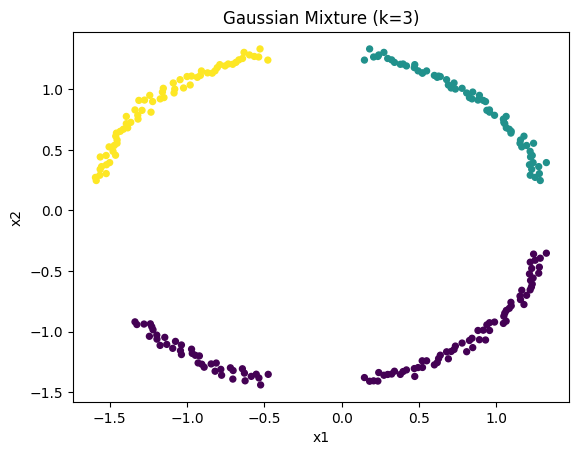

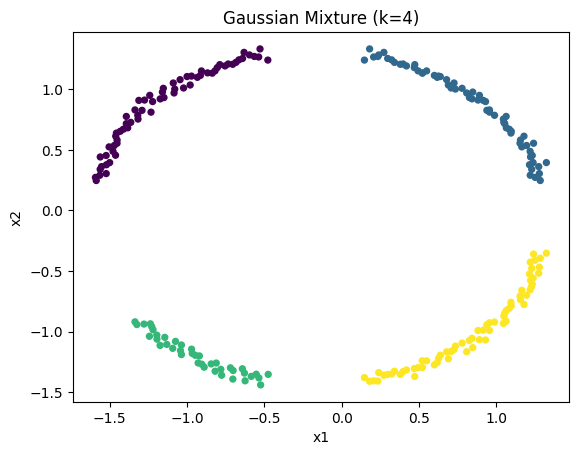

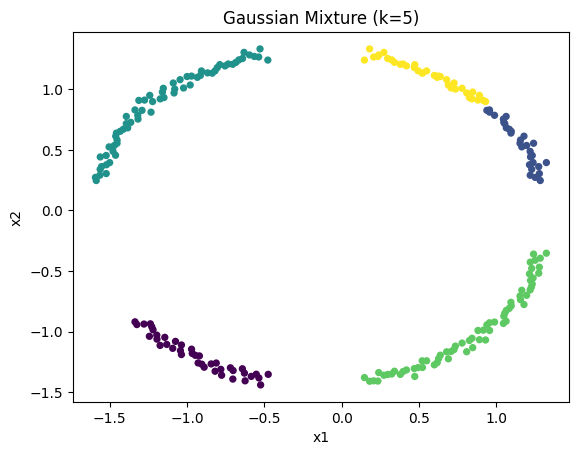

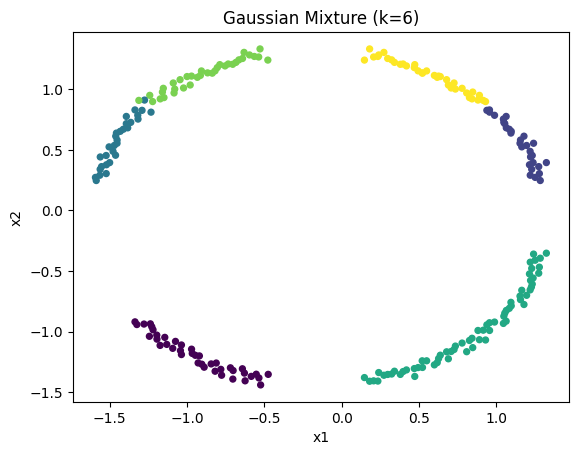

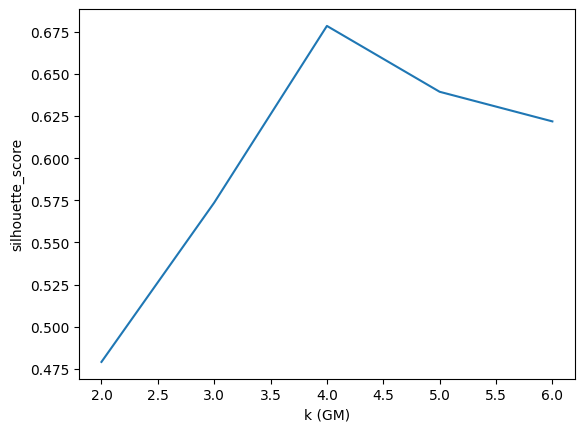

In [32]:
from sklearn.mixture import GaussianMixture

def gaussian_mixture(n_cluster=range(2,7), random_state=0):
    df = pd.read_csv("lab04_dataset_2.csv")
    X = df[["x1", "x2"]].to_numpy()
    Xn = StandardScaler().fit_transform(X)
    
    labels = {}
    sil_score = []
    
    for k in n_cluster:
        gm = GaussianMixture(n_components=k, covariance_type="full", n_init=5, random_state=random_state).fit(Xn)
        label = gm.predict(Xn)
        labels[k] = label
        sil_score.append(silhouette_score(Xn, label))
        
        plt.figure()
        plt.scatter(Xn[:, 0], Xn[:, 1], c=label, s=18)
        plt.title(f"Gaussian Mixture (k={k})")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.show()
        
    plt.figure()
    plt.plot(list(n_cluster), sil_score)
    plt.xlabel("k (GM)")
    plt.ylabel("silhouette_score")
    plt.show()
    
if __name__ == "__main__":
    gaussian_mixture()
    

### 2.c (6 marks)

Using `lab04_dataset_3.csv`, apply sklearn's `AgglomerativeClustering` on the two-dimensional data and output the resulting clusters using a scatterplot. You will apply `AgglomerativeClustering` over several clusters ranging from cluster-count `K = 2 to 6`. Make sure your scatterplot uses `K colors` to clearly distinguish the data points belonging in their respective `K clusters`. Also, compute the `Silhouette score` for each of those `K clusters` and plot the `Silhouette score` against `K clusters`. Label the plot axes accordingly.

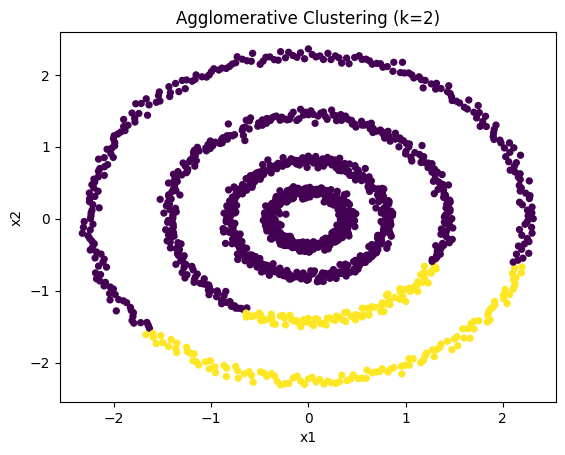

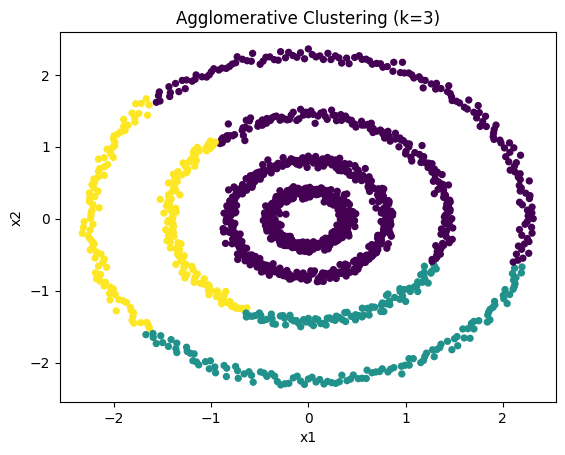

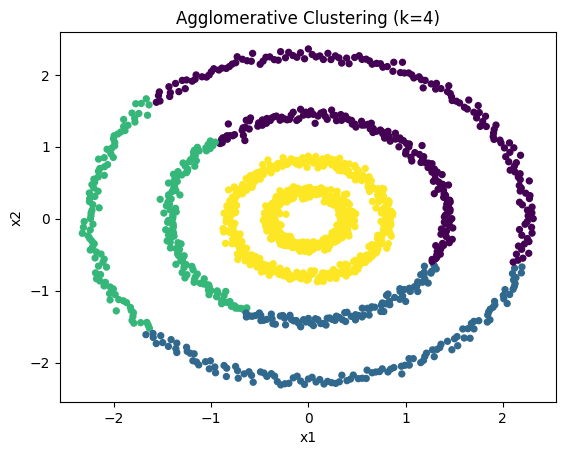

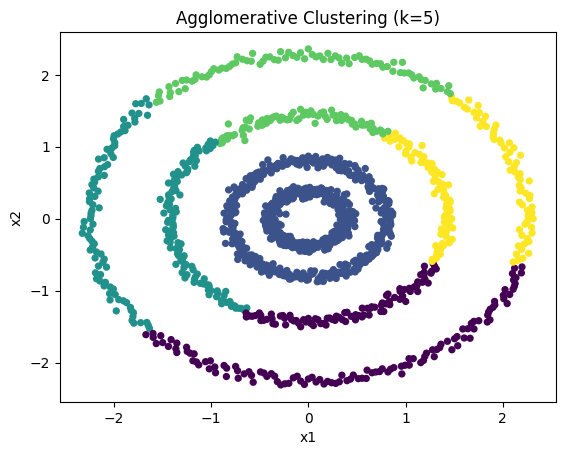

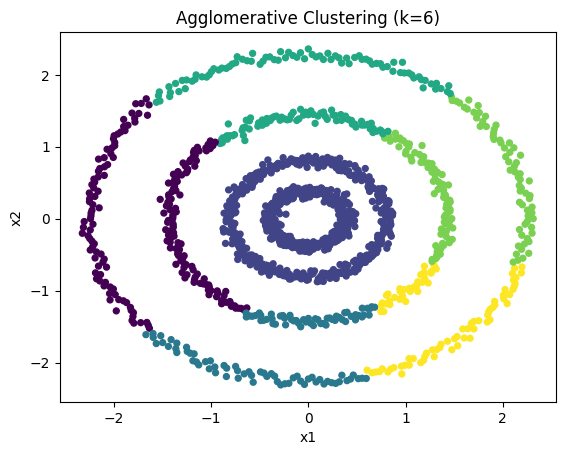

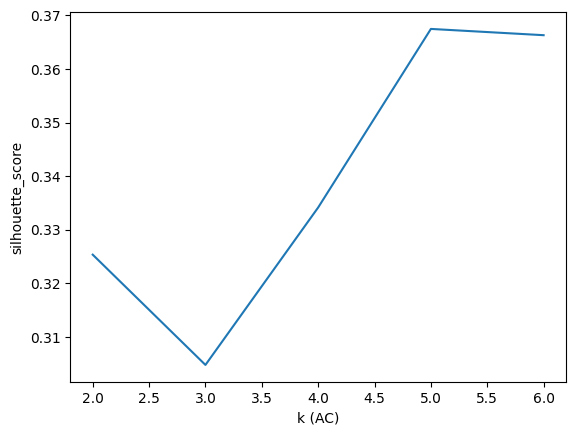

In [33]:
from sklearn.cluster import AgglomerativeClustering

def agg_clustering(n_cluster=range(2,7)):
    df = pd.read_csv("lab04_dataset_3.csv")
    X = df[['x1', 'x2']].to_numpy()
    Xn = StandardScaler().fit_transform(X)
    
    labels = {}
    sil_score = []
    
    for k in n_cluster:
        ac = AgglomerativeClustering(n_clusters=k, metric="euclidean", linkage="ward")
        label = ac.fit_predict(Xn)
        labels[k] = label
        sil_score.append(silhouette_score(Xn, label))
        
        plt.figure()
        plt.scatter(Xn[:, 0], Xn[:, 1], c=label, s=18)
        plt.title(f"Agglomerative Clustering (k={k})")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.show()
        
    plt.figure()
    plt.plot(list(n_cluster), sil_score)
    plt.xlabel("k (AC)")
    plt.ylabel("silhouette_score")
    plt.show()
    
if __name__ == "__main__":
    agg_clustering()

### 2.d (6 marks)

Repeat `2.c` but instead use sklearn's `SpectralClustering` model for learning.

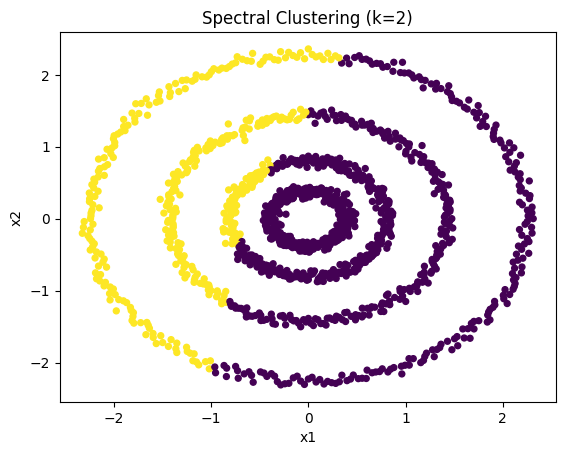

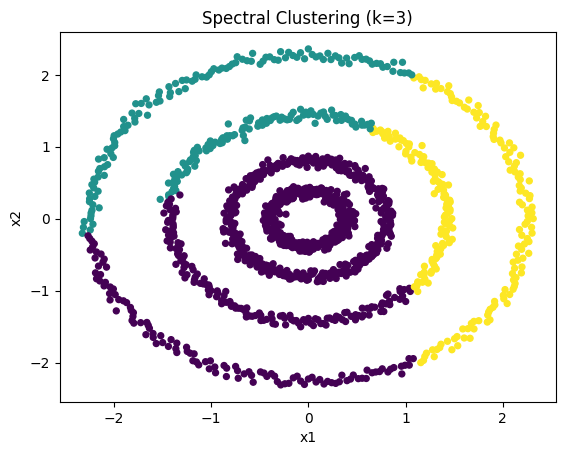

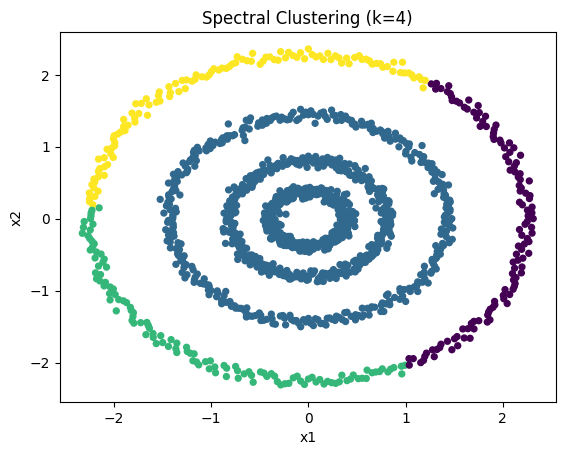

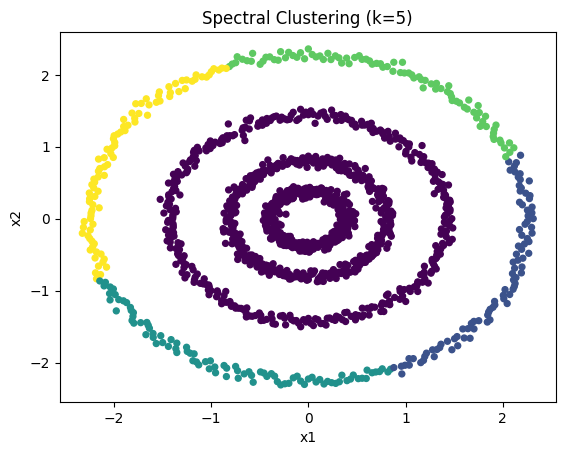

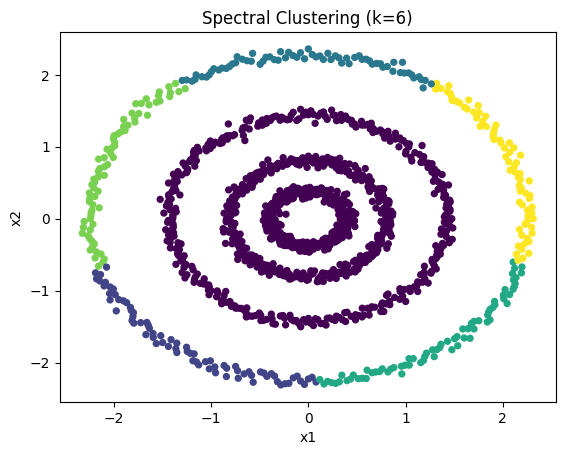

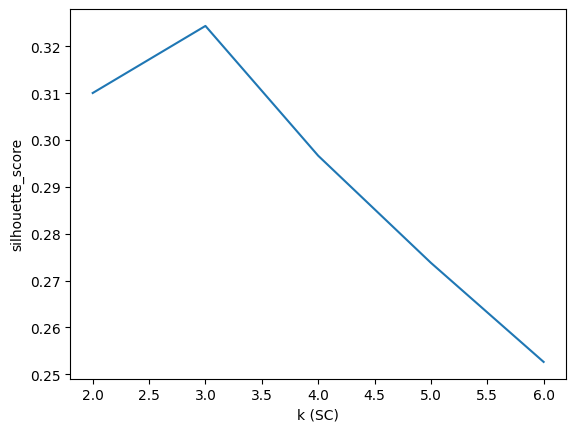

In [34]:
from sklearn.cluster import SpectralClustering

def spectral_clustering(n_cluster=range(2,7), random_state=0):
    df = pd.read_csv("lab04_dataset_3.csv")
    X = df[['x1', 'x2']].to_numpy()
    Xn = StandardScaler().fit_transform(X)
    
    labels = {}
    sil_score = []
    
    for k in n_cluster:
        sc = SpectralClustering(n_clusters=k, random_state=random_state)
        label = sc.fit_predict(Xn)
        labels[k] = label
        sil_score.append(silhouette_score(Xn, label))
        
        plt.figure()
        plt.scatter(Xn[:, 0], Xn[:, 1], c=label, s=18)
        plt.title(f"Spectral Clustering (k={k})")
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.show()
        
    plt.figure()
    plt.plot(list(n_cluster), sil_score)
    plt.xlabel("k (SC)")
    plt.ylabel("silhouette_score")
    plt.show()
    
if __name__ == "__main__":
    spectral_clustering()

### 2.e (6 marks)

The dataset `lab04_dataset_3.csv` generates 4 concentric rings, so ideally we would want 4 clusters representing the 4 concentric rings. Did the clustering attempts in `2.c` and `2.d` lead to 4 concentric ring clusters. Explore some other sklearn clustering algorithms to see which one can actually produce 4 clusters corresponding with the 4 concentric rings and display it.

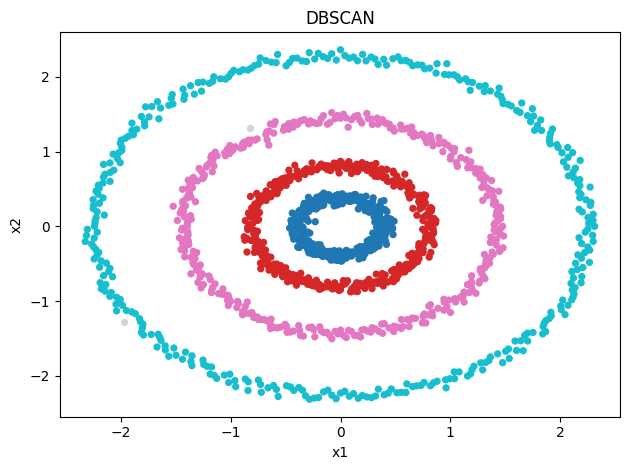

In [39]:
from sklearn.cluster import DBSCAN

def dbscan(eps_g=np.linspace(0.1, 0.8, 36), min_samples=(5, 8, 12, 16)):
    df = pd.read_csv("lab04_dataset_3.csv")
    X = df[['x1', 'x2']].to_numpy()
    Xn = StandardScaler().fit_transform(X)
    
    best = None
    
    for eps in eps_g:
        for ms in min_samples:
            lab = DBSCAN(eps=eps, min_samples=ms).fit_predict(Xn)
            n_clusters = len(set(lab) - {-1})
            if n_clusters != 4:
                continue
            mask = (lab != -1)
            if mask.sum() < 4:
                continue
            sil = silhouette_score(Xn[mask], lab[mask])
            noise_frac = 1.0 - mask.mean()
            key = sil - 0.05 * noise_frac 
            if (best is None) or (key > best[0]):
                best = (key, eps, ms, lab, noise_frac, sil)
    
    _, eps, ms, labels, noise_frac, sil = best
    
    mask = labels != -1
    plt.figure()
    plt.scatter(Xn[mask,0], Xn[mask,1], c=labels[mask], s=18, cmap="tab10")
    if (~mask).any():
        plt.scatter(Xn[~mask,0], Xn[~mask,1], c="lightgray", s=18)
    plt.title("DBSCAN")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.tight_layout()
    plt.show()
    
if __name__ == "__main__":
    dbscan()
    